In [13]:
import geopandas as gpd
import pandas as pd

In [14]:
objects_tourism = gpd.read_file('data/objects_tourism.geojson')

In [15]:
data = objects_tourism
data.head(3)

,id,name,city,street,house,post,x,y,geometry
0,1753,Мемориал,NaN,NaN,NaN,NaN,39.835405,64.553009,POINT (4434456.944 9491605.100)
1,1753,Мемориал,NaN,NaN,NaN,NaN,39.791024,64.581455,POINT (4429516.519 9498978.727)
2,1753,Мемориал,NaN,NaN,NaN,NaN,39.700588,64.497079,POINT (4419449.185 9477129.613)


In [16]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
objects_tourism = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,id,name,city,street,house,post,x,y,geometry
0,1753,Мемориал,NaN,NaN,NaN,NaN,39.835405,64.553009,POINT (39.83540 64.55301)
1,1753,Мемориал,NaN,NaN,NaN,NaN,39.791024,64.581455,POINT (39.79102 64.58146)
2,1753,Мемориал,NaN,NaN,NaN,NaN,39.700588,64.497079,POINT (39.70059 64.49708)


<Axes: >

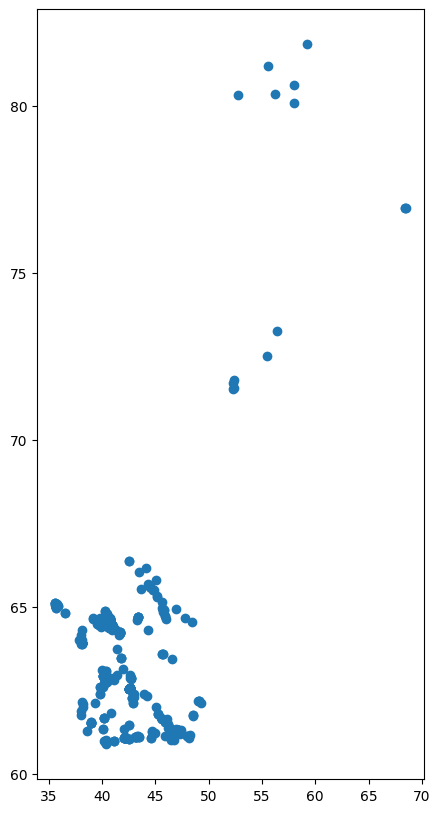

In [17]:
data.plot(figsize=(10,10))

In [18]:
data[data.id == 1753]

,id,name,city,street,house,post,x,y,geometry
0,1753,Мемориал,NaN,NaN,NaN,NaN,39.835405,64.553009,POINT (39.83540 64.55301)
1,1753,Мемориал,NaN,NaN,NaN,NaN,39.791024,64.581455,POINT (39.79102 64.58146)
2,1753,Мемориал,NaN,NaN,NaN,NaN,39.700588,64.497079,POINT (39.70059 64.49708)
3,1753,Мемориал,NaN,NaN,NaN,NaN,39.758054,64.452001,POINT (39.75805 64.45200)
4,1753,Мемориал,NaN,NaN,NaN,NaN,40.429265,64.541159,POINT (40.42927 64.54116)
...,...,...,...,...,...,...,...,...,...
265,1753,NaN,NaN,NaN,NaN,NaN,40.535111,64.637304,POINT (40.53511 64.63730)
266,1753,NaN,NaN,NaN,NaN,NaN,45.630262,61.632185,POINT (45.63026 61.63218)
267,1753,Мемориал,NaN,NaN,NaN,NaN,39.777895,64.555867,POINT (39.77790 64.55587)
296,1753,Мемориал,NaN,NaN,NaN,NaN,39.794642,64.559027,POINT (39.79464 64.55903)


In [19]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        obj = {}
        obj['id'] = objectid
        obj['name'] = row.name
        obj['city'] = row.city
        obj['street'] = row.street
        obj['house'] = row.house
        obj['post'] = row.post
        obj['geometry'] = [row['y'], row['x']]

        all_res.append(obj)

data = objects_tourism
objectids = data.id
#objectids = [ 1753 ]
for objectid in objectids:
    convert(objectid)

objects_tourism_df = pd.DataFrame(all_res)
data = objects_tourism_df
data

,id,name,city,street,house,post,geometry
0,1753,0,NaN,NaN,NaN,NaN,"[64.55300929960195, 39.835404500143014]"
1,1753,1,NaN,NaN,NaN,NaN,"[64.58145549927096, 39.79102390008107]"
2,1753,2,NaN,NaN,NaN,NaN,"[64.4970788995459, 39.70058750005569]"
3,1753,3,NaN,NaN,NaN,NaN,"[64.45200089975297, 39.75805369985965]"
4,1753,4,NaN,NaN,NaN,NaN,"[64.54115929958522, 40.42926510019532]"
...,...,...,...,...,...,...,...
74069,28321,1439,Аэропорт Васьково (Приморский район),Аэропорт Васьково,1,163512,"[64.44273607, 40.42987627]"
74070,31127,1440,Архангельск,Дзержинского проспект,2,NaN,"[64.5476489, 40.57648854]"
74071,31147,1441,Архангельск,NaN,NaN,163069,"[64.53172847, 40.52600861]"
74072,31338,1442,NaN,NaN,NaN,NaN,"[61.1092883016835, 43.44132169972345]"


In [20]:
data.to_csv('data/objects_tourism_lense.csv', index=False)